<a href="https://colab.research.google.com/github/Alaa-c/MachineLearningProj/blob/main/ML2Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy.random as rd
from scipy.spatial.distance import cdist



Read the data from iris

In [ ]:
iris=datasets.load_iris() #load data
features=iris.data[:,:2] #get only the first 2 features

features.shape


(150, 2)

Pre-process the data

In [ ]:
stdn=StandardScaler()
data_normalized=stdn.fit_transform(features)

Plot the original data

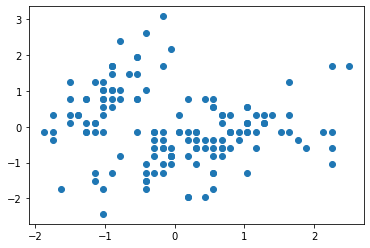

In [ ]:
plt.scatter(data_normalized[:,0],data_normalized[:,1])

Choose no of K that gives least distorion

In [ ]:
def opt_k_no(data_normalized):
  cost=[]
  for k in range(2,10):
    pts,distor,min_index=kmeans(data_normalized,100,k)
    cost.append(distor)
  ks=np.arange(2,10)
  
  plt.xlabel('no of centroids')
  plt.ylabel("Distortion")
  plt.title('elbow')
  plt.scatter(ks,cost)
  plt.show()







Initialize the centroids randomly

In [ ]:
def init_centroids(x,k,n_iter):
  
  for i in range(0,n_iter): #loop till u find the best initial centroids
    indices=rd.choice(len(x),k,replace=False) #select the item one time only
    centroids=x[indices,:]

    '''calculate distance between each centroid and samples'''
    distances=cdist(x,centroids,'euclidean')

    '''choose centroid with min distance to each sample'''
    points=np.argmin(distances,axis=1)


  return centroids,points


update the centroids

In [ ]:
def assign_update(x,points,k,n_iter):
  
  for i in range(n_iter):
    c=[]
    temp_prev=[]
    cost=0
    for indices in range(k):
      temp=x[points==indices].mean(axis=0) #update centroids by taking mean of each group  
      c.append(temp) # assign samples to centroids

     
    centroids=np.vstack(c) #concatinate vertically each centroid 
    
    '''calculate distance between each centroid and samples'''
    distances=cdist(x,centroids,'euclidean')
    
    '''choose centroid with min distance to each sample, argmin returns index of min value'''
    points=np.argmin(distances,axis=1)

    '''calculate distortion'''
    for ind in range(k):
          cost+=np.sum(np.linalg.norm((x[np.array(points) == ind] - centroids[ind]),axis = 1)**2)/len(x)
         
    '''check k value for least distortion'''
    min_index=np.argmin(cost)
    
    #check convergence
    if np.array_equal(temp,temp_prev):
      break
    temp_prev=temp
  

  return points,np.min(cost),min_index
  



Integrate the functions

In [ ]:
def kmeans(x,n_iter,k):
  #step1 initialize
  c0,points=init_centroids(x,k,n_iter)
  #update
  retrieved=assign_update(x,points,k,n_iter)
  return retrieved

In [ ]:
groups,distor,minI=kmeans(data_normalized,100,5)
print(groups)

[0 3 3 3 0 0 3 3 3 3 0 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 3 0 3 3 3 0 0 0 3 3 0
 0 3 3 0 2 3 0 0 3 0 3 0 3 4 1 4 2 1 1 1 2 1 2 2 1 2 1 1 4 1 2 2 2 1 1 2 1
 1 1 1 1 1 2 2 2 2 1 3 1 4 2 1 2 2 1 2 2 2 1 1 1 2 1 1 2 4 1 1 4 2 4 1 4 1
 1 4 2 1 1 1 4 4 2 4 2 4 1 4 4 1 1 1 4 4 4 1 1 2 4 1 1 1 4 4 4 2 4 4 1 2 1
 1 1]


Plot the clusters

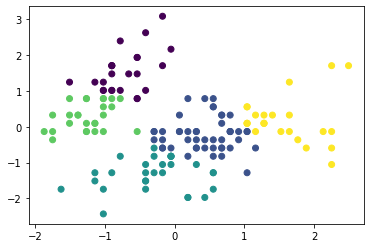

In [ ]:
plt.scatter(data_normalized[:,0],data_normalized[:,1],c=groups)

Call the function of optimized 'K'/Plot elbow

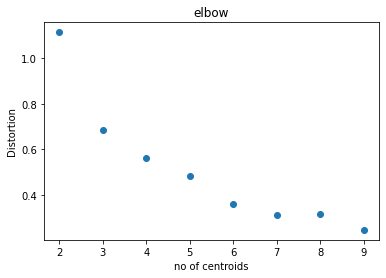

In [ ]:
opt_k_no(data_normalized)